In [2]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sea
import  requests as re
import os

## 1. Correlation Analysis

In [19]:
#dataset
api_key = os.getenv('DUNE_API_KEY')

# Metrics 
url = f"https://api.dune.com/api/v1/query/3175754/results?api_key={api_key}"
response = re.get(url)
data = response.json()
df_serie = pd.DataFrame.from_records(data['result']['rows'])
display(df_serie.head())


# Gas Price
url = f"https://api.dune.com/api/v1/query/3188865/results?api_key={api_key}"
response = re.get(url)
data = response.json()
df_gas = pd.DataFrame.from_records(data['result']['rows'])
display(df_gas.head())

,blockchain,cumulative_users,cumulative_vol,dau,month,new_users,old_users,old_users_percent,stickiness,swap_count,total_users,tx_value,vol_usd
0,arbitrum,2,NaN,1.000000,2021-06-01,2.0,0.0,0.000000,0.500000,9,2,NaN,NaN
1,arbitrum,2,2.375997e+01,1.000000,2021-07-01,NaN,NaN,NaN,0.500000,2,2,11.879987,2.375997e+01
2,arbitrum,20,4.290655e+03,5.250000,2021-08-01,18.0,1.0,0.052632,0.276316,35,19,121.911283,4.266895e+03
3,arbitrum,63947,6.272186e+08,2605.766667,2021-09-01,63927.0,12.0,0.000188,0.040754,183181,63939,3424.014008,6.272143e+08
4,arbitrum,93959,1.968888e+09,1423.580645,2021-10-01,30012.0,4597.0,0.132827,0.041133,128827,34609,10414.506118,1.341670e+09


,avg_gas_price,block_month,blockchain,month
0,0.043926,2021-06-01,arbitrum,2021-06-01 00:00:00.000 UTC
1,0.049841,2021-07-01,arbitrum,2021-07-01 00:00:00.000 UTC
2,0.217010,2021-08-01,arbitrum,2021-08-01 00:00:00.000 UTC
3,1753.794476,2021-09-01,arbitrum,2021-09-01 00:00:00.000 UTC
4,0.209804,2021-10-01,arbitrum,2021-10-01 00:00:00.000 UTC


In [25]:
df_new = pd.merge(df_serie,df_gas, how = 'left', left_on= ['month','blockchain'], right_on= ['block_month','blockchain'])
df_filter = df_new[['blockchain','avg_gas_price','total_users','new_users', 'stickiness', 'swap_count', 'vol_usd', 'tx_value' ]]
df_filter.head()

,blockchain,avg_gas_price,total_users,new_users,stickiness,swap_count,vol_usd,tx_value
0,arbitrum,0.043926,2,2.0,0.500000,9,NaN,NaN
1,arbitrum,0.049841,2,NaN,0.500000,2,2.375997e+01,11.879987
2,arbitrum,0.217010,19,18.0,0.276316,35,4.266895e+03,121.911283
3,arbitrum,1753.794476,63939,63927.0,0.040754,183181,6.272143e+08,3424.014008
4,arbitrum,0.209804,34609,30012.0,0.041133,128827,1.341670e+09,10414.506118


### 1.1 Polygon

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'avg_gas_price'),
  Text(0, 1.5, 'total_users'),
  Text(0, 2.5, 'new_users'),
  Text(0, 3.5, 'stickiness'),
  Text(0, 4.5, 'swap_count'),
  Text(0, 5.5, 'vol_usd'),
  Text(0, 6.5, 'tx_value')])

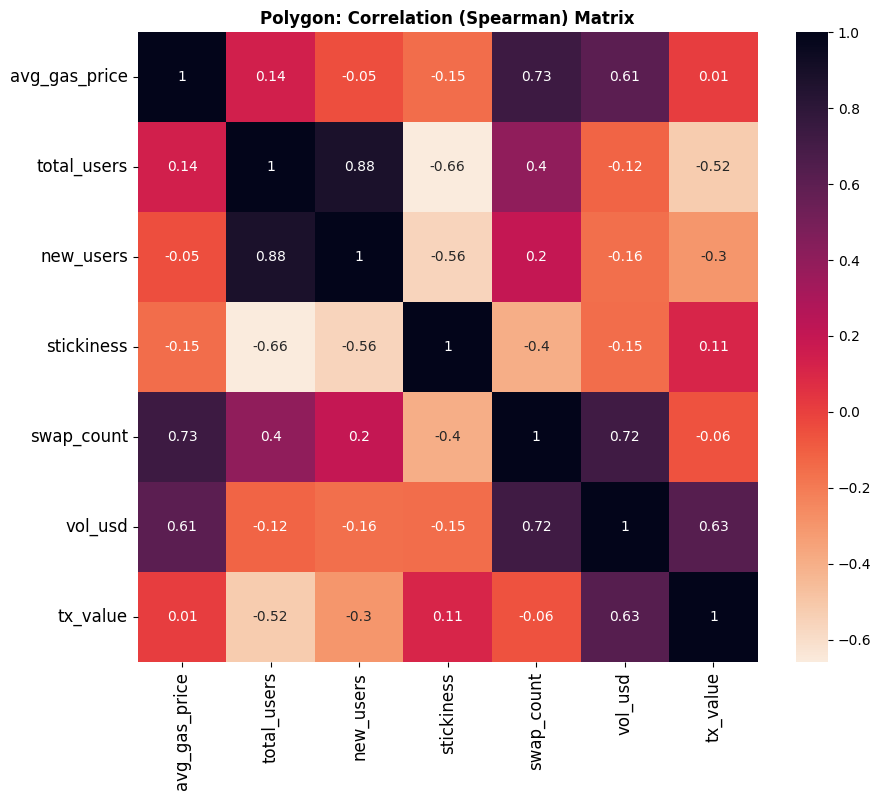

In [30]:
df_pol = df_filter[df_filter.blockchain == 'polygon']

#Correlation Matrix
corr_inc = df_pol.iloc[:,1:].corr()
sea.heatmap(round(corr_inc,2), annot = True,cmap = 'rocket_r')
plt.title("Polygon: Correlation (Spearman) Matrix", fontweight = 'bold', fontsize = 12)


#Setting
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = .25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### 1.2 Arbitrum


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'avg_gas_price'),
  Text(0, 1.5, 'total_users'),
  Text(0, 2.5, 'new_users'),
  Text(0, 3.5, 'stickiness'),
  Text(0, 4.5, 'swap_count'),
  Text(0, 5.5, 'vol_usd'),
  Text(0, 6.5, 'tx_value')])

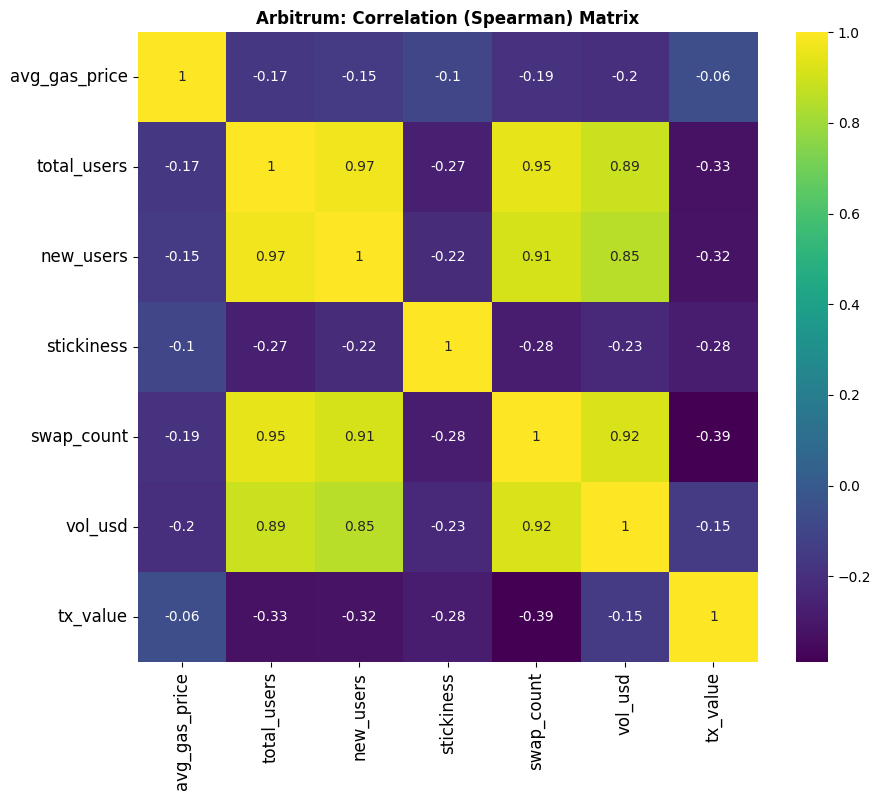

In [36]:
df_arb = df_filter[df_filter.blockchain == 'arbitrum']

#Correlation Matrix
corr_inc = df_arb.iloc[:,1:].corr()
sea.heatmap(round(corr_inc,2), annot = True,cmap = 'viridis')
plt.title("Arbitrum: Correlation (Spearman) Matrix", fontweight = 'bold', fontsize = 12)

#Setting
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = .25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### 1.3 Optimism


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'avg_gas_price'),
  Text(0, 1.5, 'total_users'),
  Text(0, 2.5, 'new_users'),
  Text(0, 3.5, 'stickiness'),
  Text(0, 4.5, 'swap_count'),
  Text(0, 5.5, 'vol_usd'),
  Text(0, 6.5, 'tx_value')])

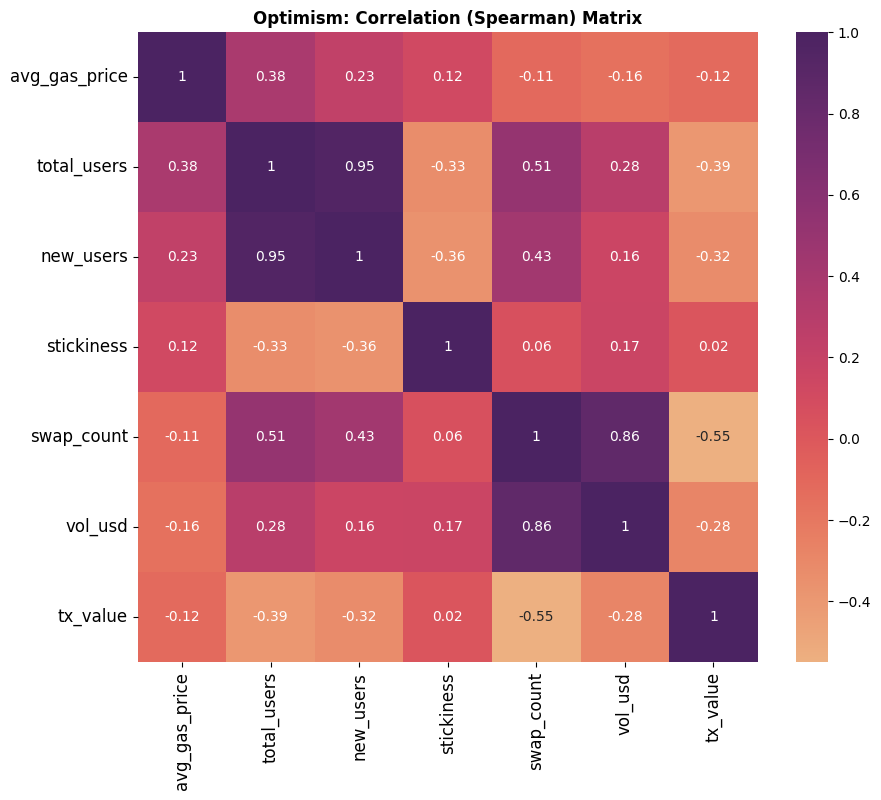

In [58]:
df_opt = df_filter[df_filter.blockchain == 'optimism']

#Correlation Matrix
corr_inc = df_opt.iloc[:,1:].corr()
sea.heatmap(round(corr_inc,2), annot = True, cmap = 'flare')
plt.title("Optimism: Correlation (Spearman) Matrix", fontweight = 'bold', fontsize = 12)

#Setting
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = .25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### 1.4 Base

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'avg_gas_price'),
  Text(0, 1.5, 'total_users'),
  Text(0, 2.5, 'new_users'),
  Text(0, 3.5, 'stickiness'),
  Text(0, 4.5, 'swap_count'),
  Text(0, 5.5, 'vol_usd'),
  Text(0, 6.5, 'tx_value')])

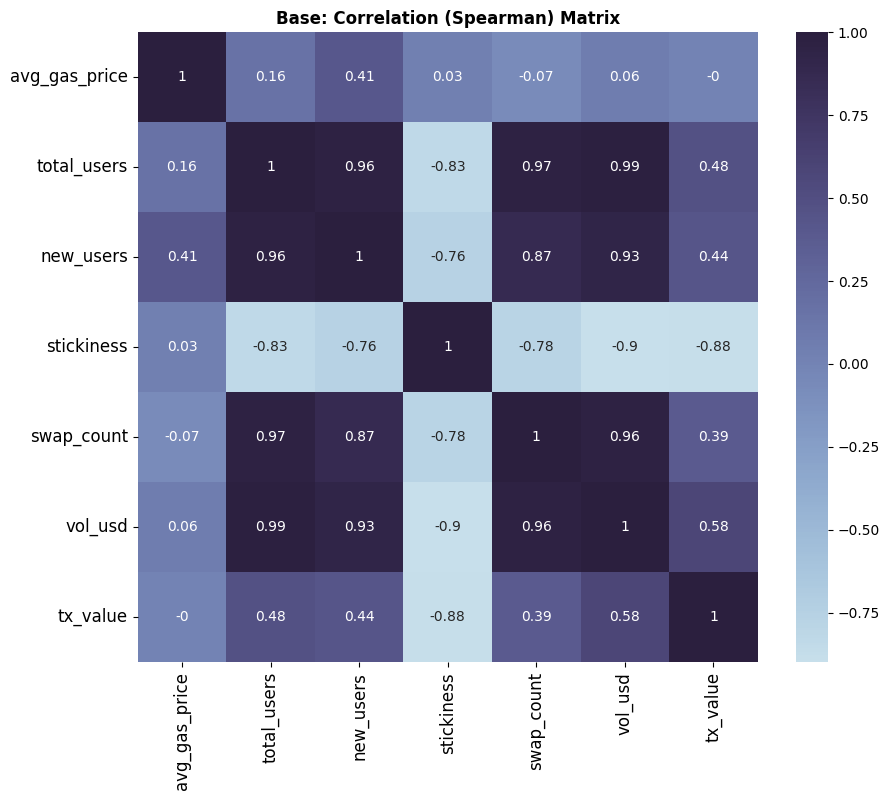

In [63]:
df_base = df_filter[df_filter.blockchain == 'base']

#Correlation Matrix
corr_inc = df_base.iloc[:,1:].corr()
sea.heatmap(round(corr_inc,2), annot = True, cmap = sea.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
plt.title("Base: Correlation (Spearman) Matrix", fontweight = 'bold', fontsize = 12)

#Setting
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = .25)
plt.xticks(size = 12)
plt.yticks(size = 12)